# Create Food Item BERT Embeddings 
# (using food name, brand, and ingredients as input)

# import packages

In [ ]:
# # conda activate dl-env (Anaconda Powershell Prompt, enter)
# # pip install sentence-transformers
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

# import OpenFoodFact data

In [ ]:
dfOFF = pd.read_csv("C:/Users/huguanla/Dropbox/545_Group_Project/545_Group_project_shared/food_fact.csv",header=0)
# transform　nutrients units
dfOFF['KCAL'] = dfOFF['energy']/4.18
dfOFF['NAsodium'] = dfOFF['sodium']*1000
dfOFF.columns
dfOFF

C:\Users\huguanla\AppData\Local\Temp\ipykernel_26340\442332836.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfOFF = pd.read_csv("C:/Users/huguanla/Dropbox/545_Group_Project/545_Group_project_shared/food_fact.csv",header=0)


,Unnamed: 0,code,product_name,brands,country,ingredients_text,additives,nutrition_grade_fr,energy,fat,...,sugars,fiber,proteins,salt,sodium,nutrition-score-fr,serving_size_numeric,serving_size_units,KCAL,NAsodium
0,67,32117,Tricolor Tortellini,Napoleon,United States,"Egg pasta (refined durum semolina wheat flour,...",0.0,c,1611.0,9.23,...,1.54,3.1,13.85,1.13284,0.446000,7.0,65.0,g,385.406699,446.000000
1,72,33060,10-Grain Pancake Mix,Bob's Red Mill,United States,"Wheat, rye, triticale, oat, corn, barley, soy ...",2.0,c,1297.0,1.72,...,5.17,6.9,13.79,2.75844,1.086000,9.0,58.0,g,310.287081,1086.000000
2,175,69601,Fresh Organic Carrots,Bunny-Luv,United States,Fresh organic carrots,0.0,a,159.0,0.00,...,6.41,2.6,1.28,0.19558,0.077000,-2.0,78.0,g,38.038278,77.000000
3,176,290616,Salade Cesar,Kirkland Signature,Canada,INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...,0.0,c,1210.0,12.00,...,0.00,2.0,22.00,2.16000,0.850000,6.0,100.0,g,289.473684,850.000000
4,182,1938067,Chaussons tressés aux pommes,Kirkland Signature,Canada,"Ingrédients : Pâte (farine, margarines d'huile...",5.0,c,1090.0,10.70,...,24.70,2.0,3.33,0.64700,0.255000,9.0,150.0,g,260.765550,255.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105180,355883,95656335,Chipotle Peppers In Adobo Sauce,La Costena,United States,"Chipotle peppers, water, vinegar, tomatoes, on...",0.0,c,280.0,0.00,...,6.67,10.0,0.00,3.21818,1.267000,6.0,30.0,g,66.985646,1267.000000
105181,355884,95659305,Dal Makhani,Truly Indian,United States,"Tomato, black gram, water, milk cream, cottons...",0.0,b,502.0,5.33,...,0.00,2.0,4.67,1.37160,0.540000,2.0,150.0,g,120.095694,540.000000
105182,355888,9577283844672,100% Pur Jus 4 agrumes,Cora,France,"Jus d'orange (dont pulpe 1,6%), jus de clément...",0.0,c,192.0,0.50,...,9.20,0.6,0.60,0.03000,0.011811,4.0,200.0,ml,45.933014,11.811024
105183,355985,9787461062105,Natural Cassava,Industria De Casabe Paul,United States,Cassava.,0.0,a,1477.0,0.00,...,2.35,4.7,1.18,0.03048,0.012000,-1.0,85.0,g,353.349282,12.000000


# BERT embedding

In [ ]:
# OpenFoodFact data - Product_Name, Brand, Ingredients
# Use BERT to transform food information text as vectors

df = dfOFF
df.isna().sum() # NA number
print(len(df), df.columns) 

df.loc[df['product_name'].isnull(),'product_name']=" "
name = df['product_name'].to_list()
embeddings_name = model.encode(name, show_progress_bar=True, device='cuda')
np.savez_compressed('C:/Users/huguanla/Dropbox/PD_UofT/2_Data/FLIP/FLIP_emb_2023/emb_name_OpenFoodFact545_20241105', emb = embeddings_name)

print(len(name), embeddings_name.shape) #print(df.isna().sum())

df.loc[df['brands'].isnull(),'brands']=" "
brand = df['brands'].to_list()
embeddings_brand = model.encode(brand, show_progress_bar=True, device='cuda')
np.savez_compressed('C:/Users/huguanla/Dropbox/PD_UofT/2_Data/FLIP/FLIP_emb_2023/emb_brand_OpenFoodFact545_20241105', emb = embeddings_brand)
print(len(brand), embeddings_brand.shape) #print(df.isna().sum())

df.loc[df['ingredients_text'].isnull(),'ingredients_text']=" "
ingred = df['ingredients_text'].to_list()
embeddings_ingred = model.encode(ingred, show_progress_bar=True, device='cuda')
np.savez_compressed('C:/Users/huguanla/Dropbox/PD_UofT/2_Data/FLIP/FLIP_emb_2023/emb_ingred_OpenFoodFact545_20241105', emb = embeddings_ingred)
print(len(ingred), embeddings_ingred.shape) #print(df.isna().sum())

df["name_m"]= "PRODUCT NAME: "
df["brand_m"]= "PRODUCT BRAND: "
df["ingred_m"]= "INGREDIENTS: "
df["sep_m"]= "; "
df["text"] = df["name_m"]+df["product_name"]+df["sep_m"] + df["brand_m"] +df["brands"] + df["sep_m"] + df["ingred_m"] +df["ingredients_text"] + df["sep_m"] 
#
text = df['text'].to_list()
embeddings_text = model.encode(text, show_progress_bar=True, device='cuda')
np.savez_compressed('C:/Users/huguanla/Dropbox/PD_UofT/2_Data/FLIP/FLIP_emb_2023/emb_text_OpenFoodFact545_20241105', emb = embeddings_text)
print(len(text), embeddings_text.shape) #print(df.isna().sum())

print(df['text'])
print(embeddings_text)

105185 Index(['Unnamed: 0', 'code', 'product_name', 'brands', 'country',
       'ingredients_text', 'additives', 'nutrition_grade_fr', 'energy', 'fat',
       'saturated-fat', 'carbohydrates', 'sugars', 'fiber', 'proteins', 'salt',
       'sodium', 'nutrition-score-fr', 'serving_size_numeric',
       'serving_size_units', 'KCAL', 'NAsodium', 'name_m', 'brand_m',
       'ingred_m', 'sep_m'],
      dtype='object')


Batches: 100%|██████████| 3288/3288 [00:18<00:00, 181.04it/s]


105185 (105185, 384)


Batches: 100%|██████████| 3288/3288 [00:19<00:00, 172.45it/s]


105185 (105185, 384)


Batches: 100%|██████████| 3288/3288 [00:37<00:00, 88.76it/s] 


105185 (105185, 384)


Batches: 100%|██████████| 3288/3288 [00:46<00:00, 70.86it/s] 


105185 (105185, 384)
0         PRODUCT NAME: Tricolor Tortellini; PRODUCT BRA...
1         PRODUCT NAME: 10-Grain Pancake Mix; PRODUCT BR...
2         PRODUCT NAME: Fresh Organic Carrots; PRODUCT B...
3         PRODUCT NAME: Salade Cesar; PRODUCT BRAND: Kir...
4         PRODUCT NAME: Chaussons tressés aux pommes; PR...
                                ...                        
105180    PRODUCT NAME: Chipotle Peppers In Adobo Sauce;...
105181    PRODUCT NAME: Dal Makhani; PRODUCT BRAND: Trul...
105182    PRODUCT NAME: 100% Pur Jus 4 agrumes ; PRODUCT...
105183    PRODUCT NAME: Natural Cassava; PRODUCT BRAND: ...
105184    PRODUCT NAME: Mint Melange Tea A Blend Of Pepp...
Name: text, Length: 105185, dtype: object
[[-0.07511602 -0.01049128 -0.02742358 ... -0.06444751  0.03569929
   0.00041496]
 [-0.07365214 -0.1278425  -0.01019233 ... -0.04936396  0.07078226
  -0.05800879]
 [-0.03471527 -0.17697527 -0.04670006 ... -0.03524527  0.09529871
   0.02236374]
 ...
 [-0.04715678 -0.08999916 -0.

# Visualation Food Embedding

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [9]:
dfOFF_processed = pd.read_csv('/Users/hgl/Dropbox/545_Group_Project/545_Group_project_shared/data/food_fact_withUnhealthScore_withNOVA_withCategory.csv', encoding='latin1')
dfOFF_processed.shape


/var/folders/js/5n02kbn11px6zj8g4xd6kb_00000gn/T/ipykernel_93115/1122105331.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfOFF_processed = pd.read_csv('/Users/hgl/Dropbox/545_Group_Project/545_Group_project_shared/data/food_fact_withUnhealthScore_withNOVA_withCategory.csv', encoding='latin1')


(105185, 26)

In [ ]:
# import BERT embeddings of Food Items in OpenFoodFact dataset
embOFF_name = np.load('/Users/hgl/Dropbox/PD_UofT/2_Data/FLIP/FLIP_emb_2023/emb_name_OpenFoodFact545_20241105.npz')['emb']
embOFF_ingred = np.load('/Users/hgl/Dropbox/PD_UofT/2_Data/FLIP/FLIP_emb_2023/emb_ingred_OpenFoodFact545_20241105.npz')['emb']

embOFFn2 = pd.DataFrame(embOFF_name)
embOFFn2 = embOFFn2.add_suffix('_n')
embOFFi2 = pd.DataFrame(embOFF_ingred)
embOFFi2 = embOFFi2.add_suffix('_i')
embOFFni = pd.concat([embOFFn2, embOFFi2], axis=1, join='inner')
embOFFni = embOFFni.to_numpy()
print(embOFFni.shape)


(105185, 768)


In [12]:
dfOFF_processed.columns

Index(['Unnamed: 0', 'code', 'product_name', 'brands', 'country',
       'ingredients_text', 'additives', 'nutrition_grade_fr', 'energy', 'fat',
       'saturated-fat', 'carbohydrates', 'sugars', 'fiber', 'proteins', 'salt',
       'sodium', 'nutrition-score-fr', 'serving_size_numeric',
       'serving_size_units', 'KCAL', 'NAsodium', 'FSANZ-hgl', 'NOVA-hgl',
       'TRA-hgl', 'TRA-name-hgl'],
      dtype='object')

In [14]:
# Filter dfOFF_processed and embOFFni
print("Original dfOFF_processed shape:", dfOFF_processed.shape)
dfOFF_filtered = dfOFF_processed[dfOFF_processed['product_name'].notnull() & 
                                 dfOFF_processed['TRA-name-hgl'].notnull() &
                           (dfOFF_processed['product_name'].str.strip() != "")]

print("Filtered dfOFF_filtered shape:", dfOFF_filtered.shape)

# Filter embOFFni
print("Original embOFFni shape:", embOFFni.shape)
filtered_indices = dfOFF_filtered.index.to_numpy()

# Check data type of embOFFni and apply appropriate filtering
if isinstance(embOFFni, np.ndarray):  # If numpy array
    embFNDDS_singleFood_filtered = embOFFni[filtered_indices]
elif isinstance(embOFFni, pd.DataFrame):  # If pandas DataFrame
    embFNDDS_singleFood_filtered = embOFFni.loc[filtered_indices]
else:
    raise ValueError("embOFFni must be a pandas DataFrame or numpy array")

print("Filtered embOFFni shape:", embFNDDS_singleFood_filtered.shape)

# Assign filtered data to df and emb
df = dfOFF_filtered
emb = embFNDDS_singleFood_filtered
dfset = "embOFFni"
print("Dataset:", dfset)

# Apply t-SNE
tsne = TSNE(random_state=1234, n_jobs=8)
x_embedded = tsne.fit_transform(emb)


Original dfOFF_processed shape: (105185, 26)
Filtered dfOFF_filtered shape: (105185, 26)
Original embOFFni shape: (105185, 768)
Filtered embOFFni shape: (105185, 768)
Dataset: embOFFni


# plot t-SNE visualization of food itmes

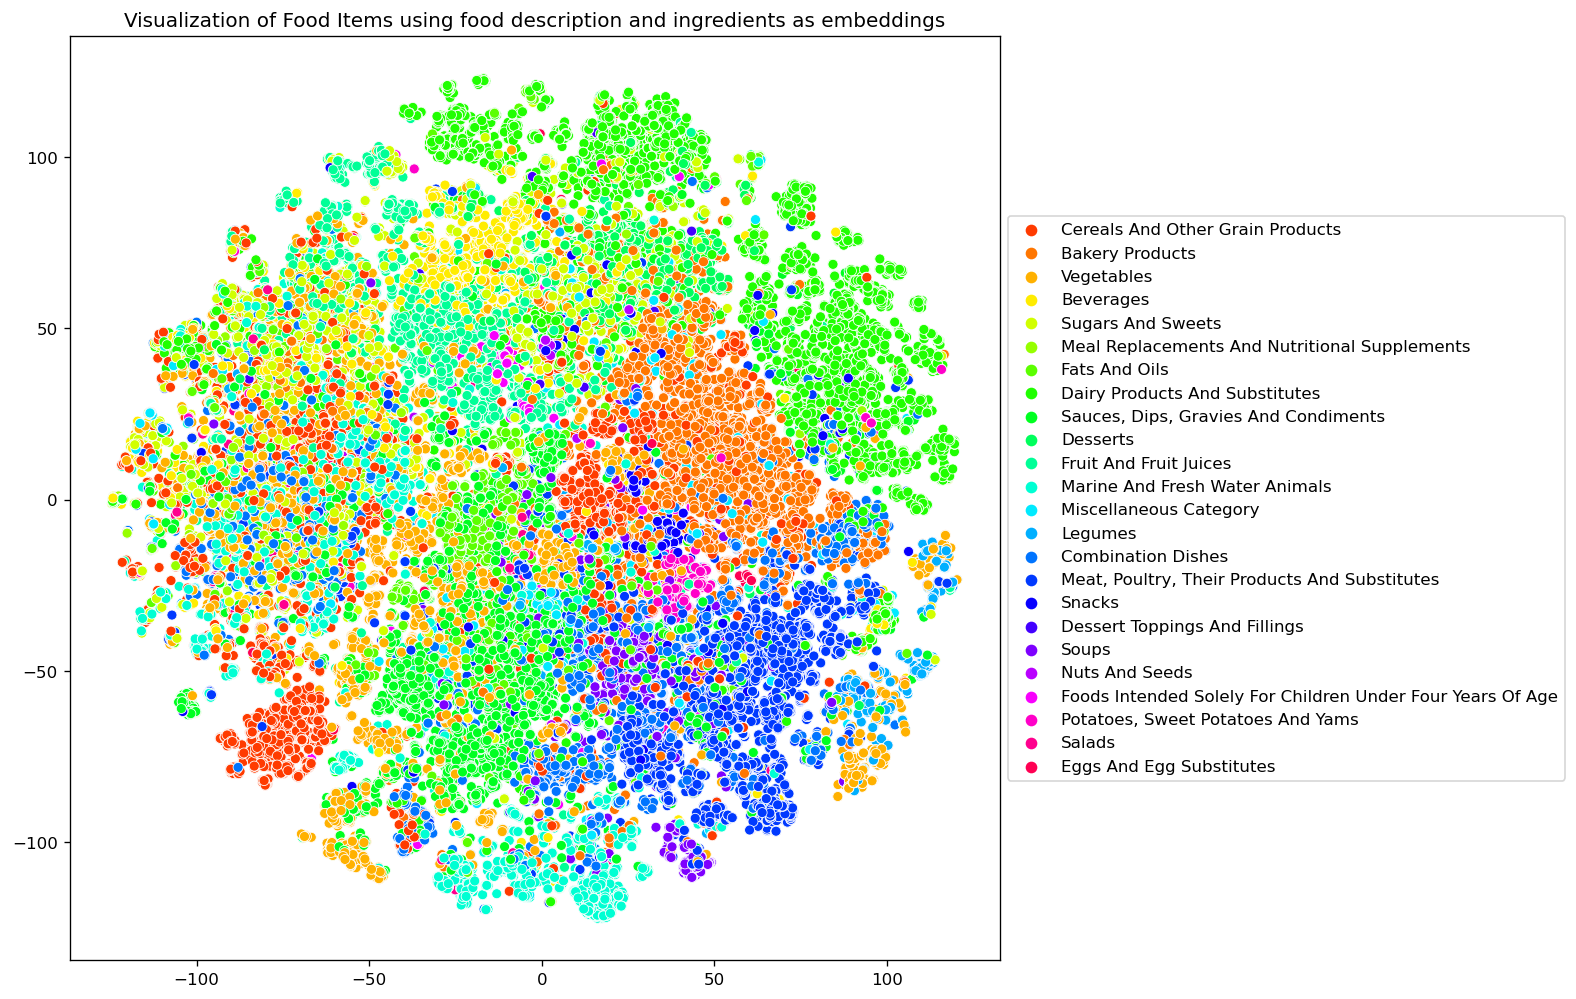

In [18]:
# Visualize food using name and ingred embedding
palette = sns.set_palette(sns.color_palette('hsv', len(set(df['TRA-name-hgl'].to_list()))))
plt.figure(figsize=(10, 10), dpi=120)
sns.scatterplot(
    x=x_embedded[:, 0],
    y=x_embedded[:, 1],
    hue=df['TRA-name-hgl'].to_list(),
    legend='full',
    palette=palette
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Moves the legend to the right
plt.title('Visualization of Food Items using food description and ingredients as embeddings')  # Add title
plt.show()
